## Importing Necessary Packages & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
mushroom = pd.read_csv('secondary.csv', sep=';')

### Imported Dataset & Basic Information

In [2]:
mushroom.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  

[5 rows x 21 columns]

In [3]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
mushroom.shape

(61069, 21)

## Dataset Normalization

In [5]:
label_encoder = LabelEncoder()

for column in mushroom.columns:
    if mushroom[column].dtype == 'object': 
        mushroom[column] = label_encoder.fit_transform(mushroom[column])

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mushroom)

## Feature Selection

In [7]:
X = mushroom.drop('class', axis=1)
y = mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We are using information gain to select feature

In [8]:
mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info

array([0.03321515, 0.02140401, 0.02965601, 0.03282773, 0.        ,
       0.02730043, 0.00692912, 0.02145235, 0.04683373, 0.06380024,
       0.03834002, 0.0495019 , 0.04156347, 0.0090861 , 0.02543229,
       0.00231268, 0.02622266, 0.03558787, 0.02023123, 0.01052678])

In [9]:
print(len(mutual_info))
print(X_train.shape)

20
(42748, 20)


In [10]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

stem-width              0.063800
stem-surface            0.049502
stem-height             0.046834
stem-color              0.041563
stem-root               0.038340
spore-print-color       0.035588
cap-diameter            0.033215
cap-color               0.032828
cap-surface             0.029656
gill-attachment         0.027300
ring-type               0.026223
veil-color              0.025432
gill-color              0.021452
cap-shape               0.021404
habitat                 0.020231
season                  0.010527
veil-type               0.009086
gill-spacing            0.006929
has-ring                0.002313
does-bruise-or-bleed    0.000000
dtype: float64

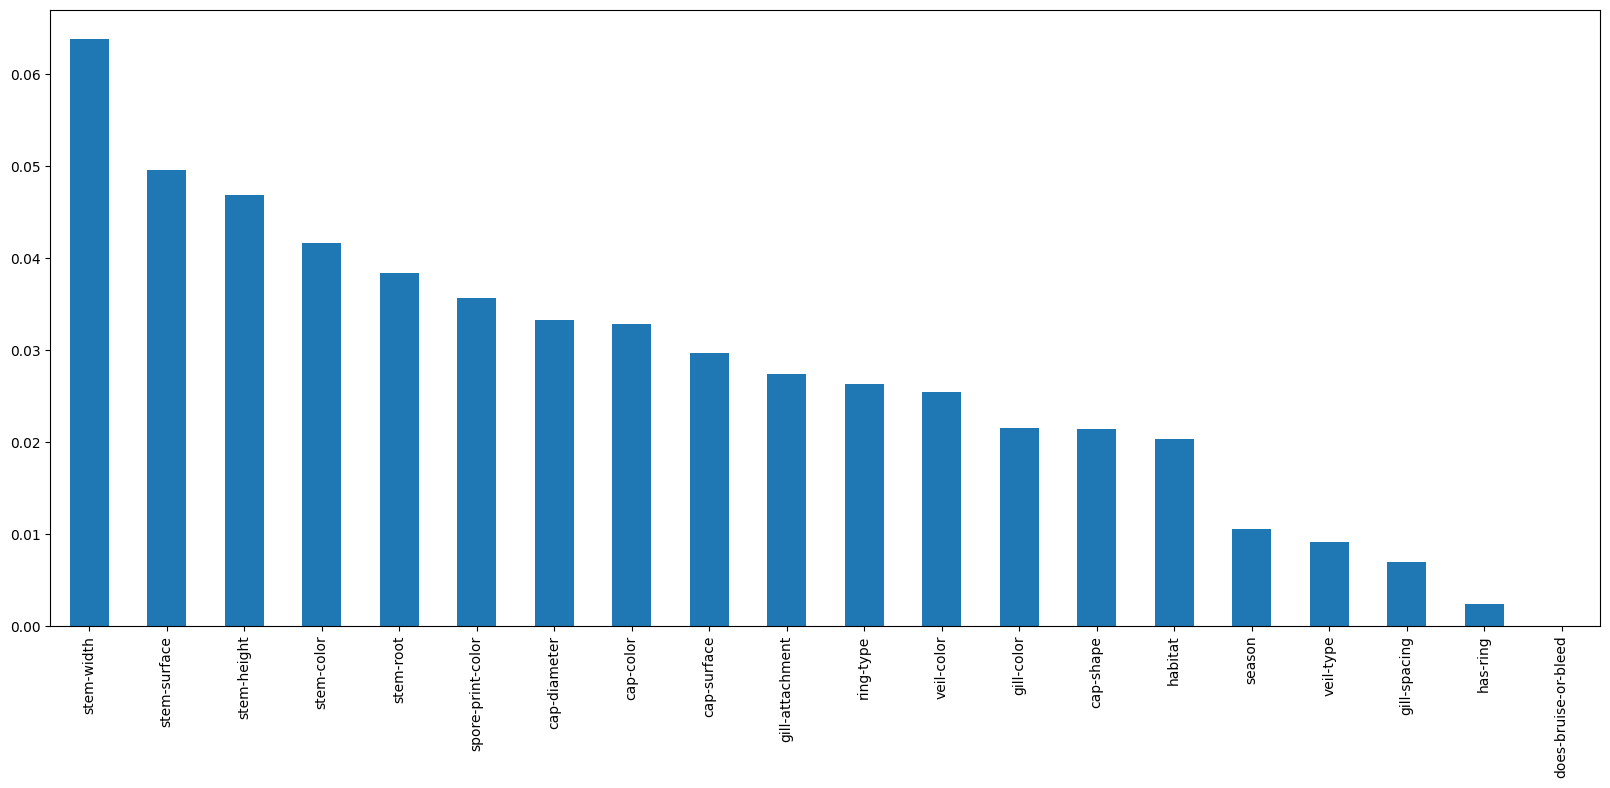

In [11]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

## Refurbished Dataset

In [12]:
new_mush = mushroom.drop(['does-bruise-or-bleed', 'has-ring', 'veil-type', 'gill-spacing', 'season'], axis=1)

In [13]:
new_mush.isna().sum()

class                0
cap-diameter         0
cap-shape            0
cap-surface          0
cap-color            0
gill-attachment      0
gill-color           0
stem-height          0
stem-width           0
stem-root            0
stem-surface         0
stem-color           0
veil-color           0
ring-type            0
spore-print-color    0
habitat              0
dtype: int64

In [14]:
new_mush.describe(include='all')

class  cap-diameter     cap-shape   cap-surface     cap-color  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       0.554913      6.733854      4.041641      6.758666      6.144541   
std        0.496979      5.264845      2.138630      3.697194      3.171077   
min        0.000000      0.380000      0.000000      0.000000      0.000000   
25%        0.000000      3.480000      2.000000      3.000000      5.000000   
50%        1.000000      5.860000      5.000000      8.000000      5.000000   
75%        1.000000      8.540000      6.000000     10.000000     10.000000   
max        1.000000     62.340000      6.000000     11.000000     11.000000   

       gill-attachment    gill-color   stem-height    stem-width  \
count     61069.000000  61069.000000  61069.000000  61069.000000   
mean          3.242938      7.338502      6.581538     12.149410   
std           2.593530      3.186426      3.370017     10.035955   
min           0.000000      0.000000      0.000000      0.000000   
25%           1.000000      5.000000      4.640000      5.210000   
50%           3.000000      7.000000      5.950000     10.190000   
75%           6.000000     10.000000      7.740000     16.570000   
max           7.000000     11.000000     33.920000    103.910000   

          stem-root  stem-surface    stem-color    veil-color     ring-type  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       4.543353      6.679461      8.429072      5.713685      1.733236   
std        1.256036      2.110324      3.218516      0.852051      1.950244   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      5.000000      6.000000      6.000000      1.000000   
50%        5.000000      8.000000     11.000000      6.000000      1.000000   
75%        5.000000      8.000000     11.000000      6.000000      1.000000   
max        5.000000      8.000000     12.000000      6.000000      8.000000   

       spore-print-color       habitat  
count       61069.000000  61069.000000  
mean            6.548069      0.623721  
std             1.465584      1.265880  
min             0.000000      0.000000  
25%             7.000000      0.000000  
50%             7.000000      0.000000  
75%             7.000000      1.000000  
max             7.000000      7.000000

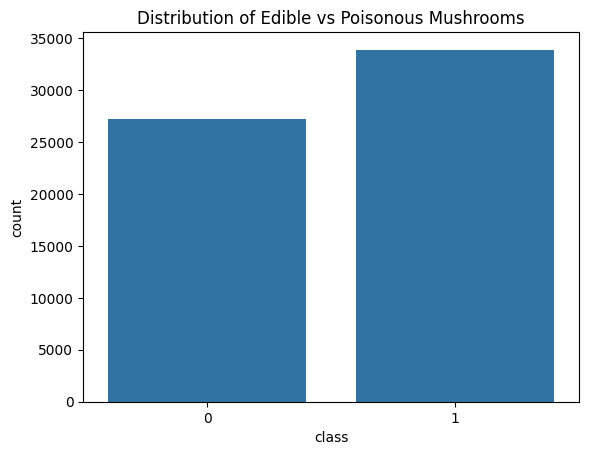

In [15]:
sns.countplot(x='class', data=new_mush)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

In [16]:
new_mush.head()

class  cap-diameter  cap-shape  cap-surface  cap-color  gill-attachment  \
0      1         15.26          6            2          6                2   
1      1         16.60          6            2          6                2   
2      1         14.07          6            2          6                2   
3      1         14.17          2            3          1                2   
4      1         14.64          6            3          6                2   

   gill-color  stem-height  stem-width  stem-root  stem-surface  stem-color  \
0          10        16.95       17.09          4             7          11   
1          10        17.99       18.19          4             7          11   
2          10        17.80       17.74          4             7          11   
3          10        15.77       15.98          4             7          11   
4          10        16.53       17.20          4             7          11   

   veil-color  ring-type  spore-print-color  habitat  
0           4          2                  7        0  
1           4          2                  7        0  
2           4          2                  7        0  
3           4          5                  7        0  
4           4          5                  7        0

In [17]:
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(new_mush)

selected_columns = new_mush.columns[var_thresh.get_support()]
for cols in new_mush.columns:
    if cols not in selected_columns:
        new_mush.drop(columns = cols, inplace = True)

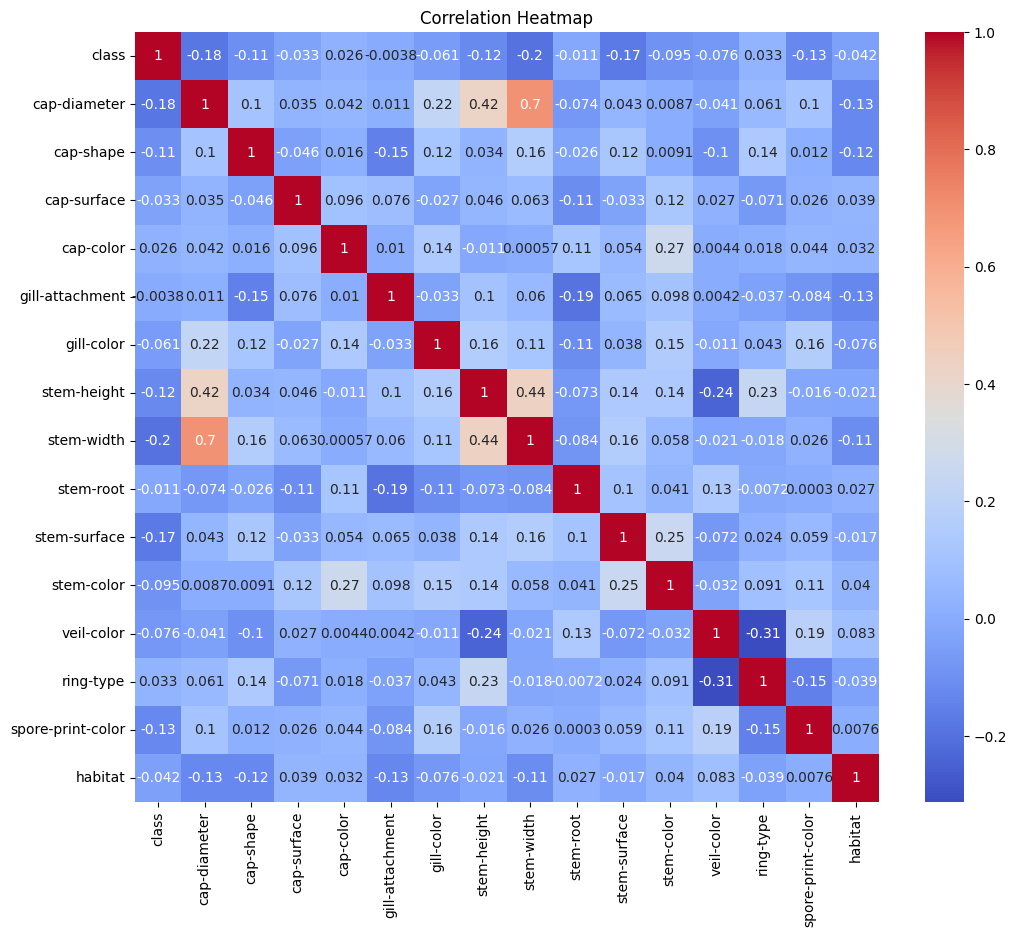

In [18]:
numeric_mush = new_mush.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_mush.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
X = new_mush.drop('class', axis=1)
y = new_mush['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
X_train.describe()

cap-diameter     cap-shape   cap-surface     cap-color  \
count  42748.000000  42748.000000  42748.000000  42748.000000   
mean       6.736502      4.037592      6.759474      6.146720   
std        5.326759      2.142177      3.689859      3.171415   
min        0.380000      0.000000      0.000000      0.000000   
25%        3.470000      2.000000      3.000000      5.000000   
50%        5.840000      5.000000      8.000000      5.000000   
75%        8.540000      6.000000     10.000000     10.000000   
max       59.460000      6.000000     11.000000     11.000000   

       gill-attachment    gill-color   stem-height    stem-width  \
count     42748.000000  42748.000000  42748.000000  42748.000000   
mean          3.250749      7.336718      6.576191     12.152749   
std           2.593295      3.186124      3.354189     10.079228   
min           0.000000      0.000000      0.000000      0.000000   
25%           1.000000      5.000000      4.630000      5.160000   
50%           3.000000      7.000000      5.950000     10.160000   
75%           6.000000     10.000000      7.750000     16.590000   
max           7.000000     11.000000     33.920000    103.910000   

          stem-root  stem-surface    stem-color    veil-color     ring-type  \
count  42748.000000  42748.000000  42748.000000  42748.000000  42748.000000   
mean       4.543183      6.672733      8.427622      5.712618      1.735239   
std        1.254270      2.118087      3.216435      0.856768      1.955810   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      5.000000      6.000000      6.000000      1.000000   
50%        5.000000      8.000000     11.000000      6.000000      1.000000   
75%        5.000000      8.000000     11.000000      6.000000      1.000000   
max        5.000000      8.000000     12.000000      6.000000      8.000000   

       spore-print-color       habitat  
count       42748.000000  42748.000000  
mean            6.544774      0.625246  
std             1.469469      1.264294  
min             0.000000      0.000000  
25%             7.000000      0.000000  
50%             7.000000      0.000000  
75%             7.000000      1.000000  
max             7.000000      7.000000

In [21]:
X_test.describe()

cap-diameter     cap-shape   cap-surface     cap-color  \
count  18321.000000  18321.000000  18321.000000  18321.000000   
mean       6.727676      4.051089      6.756782      6.139457   
std        5.117609      2.130361      3.714352      3.170369   
min        0.440000      0.000000      0.000000      0.000000   
25%        3.530000      2.000000      3.000000      5.000000   
50%        5.910000      5.000000      8.000000      5.000000   
75%        8.550000      6.000000     10.000000     10.000000   
max       62.340000      6.000000     11.000000     11.000000   

       gill-attachment    gill-color   stem-height    stem-width  \
count     18321.000000  18321.000000  18321.000000  18321.000000   
mean          3.224715      7.342667      6.594016     12.141619   
std           2.594059      3.187215      3.406722      9.934523   
min           0.000000      0.000000      0.000000      0.000000   
25%           1.000000      5.000000      4.650000      5.320000   
50%           3.000000      8.000000      5.960000     10.250000   
75%           6.000000     10.000000      7.740000     16.530000   
max           7.000000     11.000000     33.720000     95.680000   

          stem-root  stem-surface    stem-color    veil-color     ring-type  \
count  18321.000000  18321.000000  18321.000000  18321.000000  18321.000000   
mean       4.543748      6.695159      8.432455      5.716173      1.728563   
std        1.260181      2.092074      3.223453      0.840958      1.937241   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      6.000000      6.000000      6.000000      1.000000   
50%        5.000000      8.000000     11.000000      6.000000      1.000000   
75%        5.000000      8.000000     11.000000      6.000000      1.000000   
max        5.000000      8.000000     12.000000      6.000000      8.000000   

       spore-print-color       habitat  
count       18321.000000  18321.000000  
mean            6.555756      0.620163  
std             1.456489      1.269600  
min             0.000000      0.000000  
25%             7.000000      0.000000  
50%             7.000000      0.000000  
75%             7.000000      1.000000  
max             7.000000      7.000000

In [22]:
X_train.head()

cap-diameter  cap-shape  cap-surface  cap-color  gill-attachment  \
9601           0.99          6            2         10                0   
35303          7.70          6           10         11                0   
47265          1.68          6           11          5                7   
12457          1.58          6            7         11                0   
41914          1.47          0            3          5                0   

       gill-color  stem-height  stem-width  stem-root  stem-surface  \
9601           10         3.67        1.58          5             8   
35303           5         9.69        9.49          5             7   
47265           4         4.94        2.63          5             5   
12457          10         5.59        1.77          5             6   
41914           5         5.11        1.66          5             6   

       stem-color  veil-color  ring-type  spore-print-color  habitat  
9601            6           6          1                  7        3  
35303          12           6          8                  7        0  
47265           6           6          1                  1        1  
12457          12           6          1                  7        2  
41914           6           6          1                  7        0

In [23]:
X_test.head()

cap-diameter  cap-shape  cap-surface  cap-color  gill-attachment  \
22013          3.49          6           11         11                0   
50754          3.53          6            5          5                4   
8236           3.64          2           11         10                6   
15005         10.04          6            7          5                0   
15985          7.16          0            3          3                5   

       gill-color  stem-height  stem-width  stem-root  stem-surface  \
22013          11         2.98        8.27          5             8   
50754           1         5.03       10.74          5             8   
8236            7         8.06        4.09          5             8   
15005          10         7.40       12.85          5             3   
15985          10         4.72        9.07          5             5   

       stem-color  veil-color  ring-type  spore-print-color  habitat  
22013          11           6          1                  7        0  
50754          12           6          1                  7        0  
8236            6           6          1                  7        0  
15005           6           6          8                  6        0  
15985           3           6          1                  7        0

## Data Analysis

In [24]:
features = new_mush.columns
target = 'class'
features = list(features.drop(target))
features

['cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'habitat']

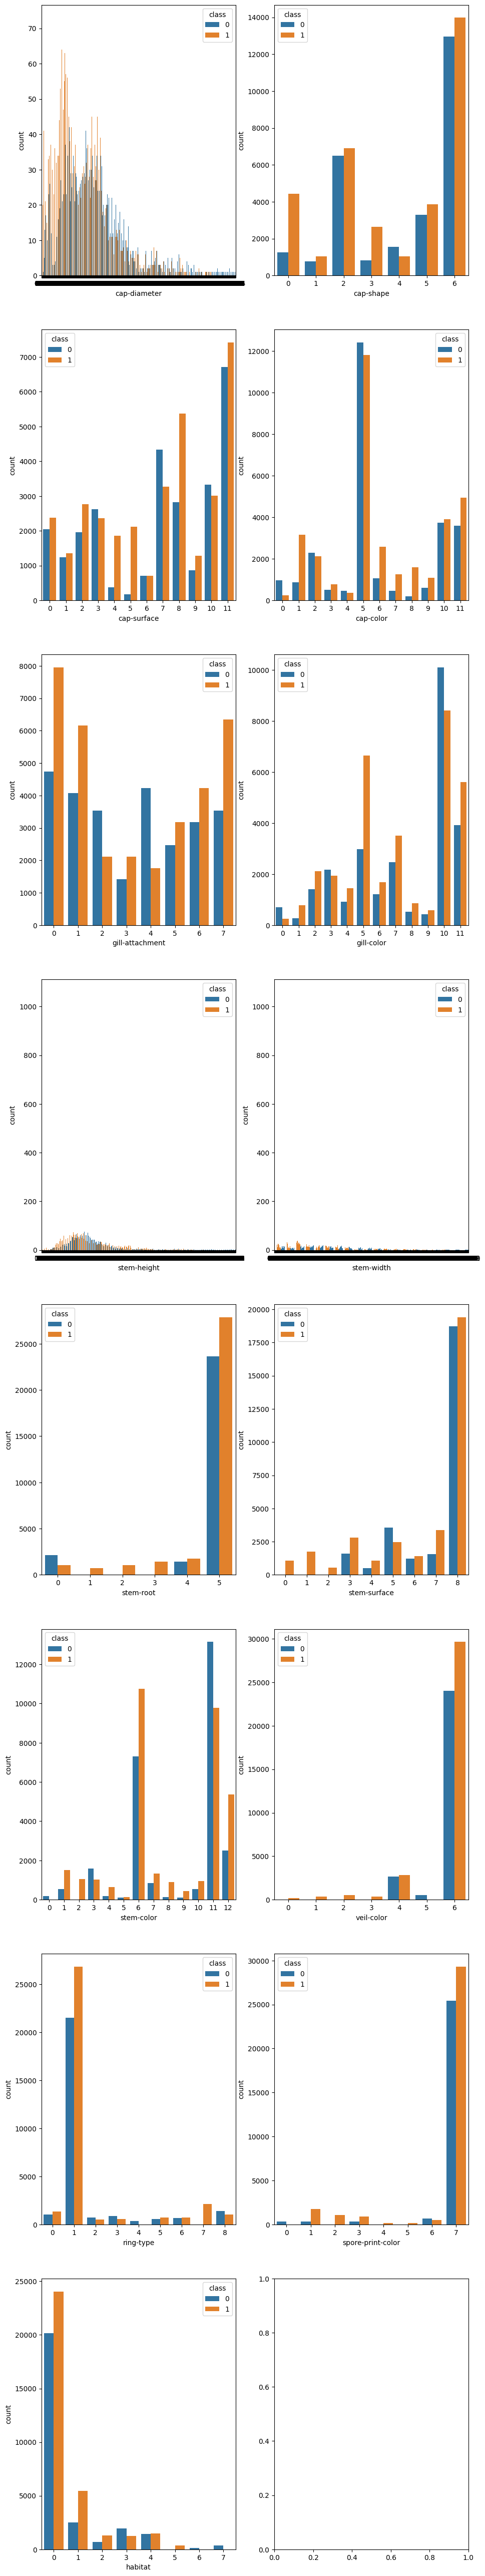

In [25]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(11, 66))

for f, ax in zip(features, axs.ravel()):
    sns.countplot(x=f, hue='class', data=new_mush, ax = ax)

# Training, Testing & Evaluating Models

### Random Forest

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8198
           1       1.00      1.00      1.00     10123

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



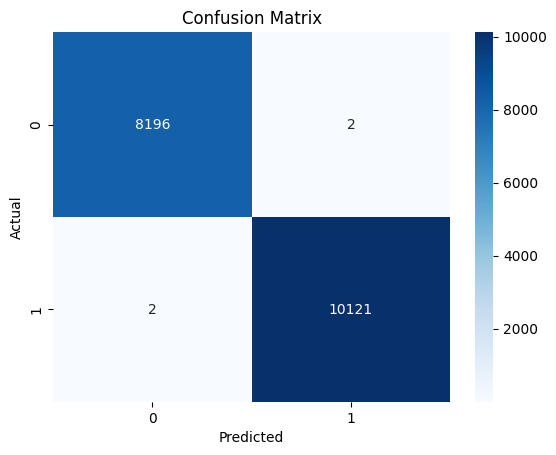

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost

In [28]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb=xgb.predict(X_test)
print('XGBoost Accuracy' , accuracy_score(y_test,y_xgb))

XGBoost Accuracy 0.9995633426123028


### Logistic Regression

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(X_test_scaled)

In [32]:
print("Accuracy score is {}".format(lr.score(X_test_scaled, y_test)))

Accuracy score is 0.61896184706075


In [33]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

           0       0.59      0.48      0.53      8198
           1       0.63      0.73      0.68     10123

    accuracy                           0.62     18321
   macro avg       0.61      0.61      0.60     18321
weighted avg       0.62      0.62      0.61     18321



### KFold Cross Validation

In [34]:
kfold_validation = KFold(n_splits = 10, shuffle = True, random_state = 42)
clf = DecisionTreeClassifier()

results = cross_val_score(clf, X, y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.99688882 0.99705256 0.99721631 0.99607008 0.99721631 0.99607008
 0.9978713  0.9950876  0.9950876  0.99737963]

Results =  0.9965940294682593 +/- 0.000916943744430907


In [35]:
skfold = StratifiedKFold(n_splits=5)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X, y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.40731947 0.44530866 0.51342721 0.63631898 0.54818636]

Results =  0.5101121366687211 +/- 0.08019304922960897


## Lime

In [36]:
import lime
import lime.lime_tabular

In [37]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)

In [38]:
exp = explainer.explain_instance(X_test.iloc[0], rf.predict_proba)
exp.show_in_notebook(show_table = True)

G:\04 Softwares\410 Tech\Lang Env\Python\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
G:\04 Softwares\410 Tech\Lang Env\Python\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
G:\04 Softwares\410 Tech\Lang Env\Python\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

In [39]:
exp = explainer.explain_instance(X_test.iloc[10], rf.predict_proba)
exp.show_in_notebook(show_table = True)

G:\04 Softwares\410 Tech\Lang Env\Python\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
G:\04 Softwares\410 Tech\Lang Env\Python\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
G:\04 Softwares\410 Tech\Lang Env\Python\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

In [40]:
print(X_test)
print(y_test)

       cap-diameter  cap-shape  cap-surface  cap-color  gill-attachment  \
22013          3.49          6           11         11                0   
50754          3.53          6            5          5                4   
8236           3.64          2           11         10                6   
15005         10.04          6            7          5                0   
15985          7.16          0            3          3                5   
...             ...        ...          ...        ...              ...   
15433          9.96          2           10          5                7   
44606          7.51          0           10         10                7   
25320         15.15          2            7         10                0   
16263          5.06          2           10          5                5   
19139          4.37          6            8         11                0   

       gill-color  stem-height  stem-width  stem-root  stem-surface  \
22013          11         2.

In [41]:
exp.as_pyplot_figure()